# 사용자 구매 전환율 분석 프로젝트

1. 데이터 품질 관리\
1) 데이터 탐색\
2) 초기분석 및 EDA : 컬럼확인\
3) 데이터 전처리

2. 분석\
1) 목적 및 문제 정의\
2) 지표 설정\
3) 현상 파악\
4) 평가\
5) 원인 도출\
6) 해결 방안 및 액션 도출

# 데이터 품질 확인


## 1.데이터 탐색

In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
path = '/content/drive/MyDrive/Colab Notebooks/DA(AI)/kaggle_cosmetics/' ## kaggle eCommerce events history cosmetics shop

In [ ]:
# 하나의 파일로 결합
dfs = []

for file in os.listdir(path):
    if file.endswith(".csv"):
        file_path = os.path.join(path, file)
        dfs.append(pd.read_csv(file_path))

combined_df = pd.concat(dfs, ignore_index=True)

output_file = '/content/drive/MyDrive/Colab Notebooks/DA(AI)/kaggle_combined_file.csv'

combined_df.to_csv(output_file, index=False)

print(f"Combined CSV file saved at: {output_file}")

In [21]:
path_kaggle = '/content/drive/MyDrive/Colab Notebooks/DA(AI)/kaggle_cosmetics/kaggle_combined_file.csv' ## 결합한 캐글 데이터

In [22]:
pd.read_csv(path_kaggle)
df = pd.read_csv(path_kaggle)

In [23]:
df_1 = df.copy()

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


In [ ]:
df_1.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
dtype: int64

In [ ]:
null_table = df_1.isnull().value_counts()
pd.DataFrame(null_table)

0
event_time event_type product_id category_id category_code brand price user_id user_session          
False      False      False      False       True          False False False   False         11666045
                                                           True  False False   False          8668652
                                             False         False False False   False           266709
                                                           True  False False   False            86836
                                             True          False False False   True              2929
                                                           True  False False   True              1620
                                             False         False False False   True                40
                                                           True  False False   True                 9

event_time: 이벤트(예: 조회, 구매)가 발생한 시간

event_type: 이벤트 유형(예: 조회, 장바구니, 구매)

product_id: 제품의 ID

category_id: 해당 상품이 속한 카테고리의 ID

category_code: 제품 카테고리를 나타내는 코드

brand: 제품의 브랜드

price: 제품 가격

user_id: 사용자의 ID

user_session: 사용자 세션의 ID

## 2.초기분석 및 EDA

In [ ]:
df_1.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
5,2019-12-01 00:00:09 UTC,view,5773361,1487580005134238553,NaN,runail,2.62,560109803,38cf4ba1-4a0a-4c9e-b870-46685d105f95
6,2019-12-01 00:00:18 UTC,cart,5629988,1487580009311764506,NaN,NaN,1.19,579966747,1512be50-d0fd-4a92-bcd8-3ea3943f2a3b
7,2019-12-01 00:00:22 UTC,view,5807805,1487580005713052531,NaN,ingarden,4.44,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
8,2019-12-01 00:00:27 UTC,view,5588608,1487580008145748965,NaN,roubloff,5.40,546170008,676d9fcc-2a4f-4448-b49d-136f2e4208c1
9,2019-12-01 00:00:34 UTC,cart,5335,1487580009605365797,NaN,runail,0.40,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


In [ ]:
df_1['event_time'].value_counts()

2020-02-15 16:08:37 UTC    3087
2020-02-05 09:55:55 UTC    2067
2020-02-06 18:10:38 UTC    1982
2020-02-05 09:55:40 UTC    1892
2020-02-15 16:08:56 UTC    1075
                           ... 
2019-10-13 00:27:19 UTC       1
2019-10-13 00:27:17 UTC       1
2019-10-13 00:27:16 UTC       1
2019-10-13 00:27:13 UTC       1
2020-01-31 23:59:58 UTC       1
Name: event_time, Length: 8782890, dtype: int64

In [ ]:
df_1['event_type'].value_counts()

view                9657821
cart                5768333
remove_from_cart    3979679
purchase            1287007
Name: event_type, dtype: int64

In [ ]:
df_1['product_id'].value_counts()

5809910    141650
5809912     55606
5700037     51111
5802432     45008
5854897     44799
            ...  
5815775         1
5688893         1
5568096         1
5701709         1
5682848         1
Name: product_id, Length: 54571, dtype: int64

In [ ]:
df_1['category_id'].value_counts()

1487580007675986893    1062716
1487580005595612013     789465
1487580005092295511     770985
1487580005671109489     680648
1487580006317032337     646704
                        ...   
1487580007155893175          2
1487580009890578479          1
1487580010897211483          1
1487580011056595041          1
1487580009706029097          1
Name: category_id, Length: 525, dtype: int64

In [ ]:
df_1['category_code'].value_counts()  ## 결측치 다수 -> 카테고리 id와 매칭시켜서 보완하기

appliances.environment.vacuum             149168
stationery.cartrige                        59728
apparel.glove                              52575
furniture.living_room.cabinet              30560
accessories.bag                            24253
furniture.bathroom.bath                    23931
appliances.personal.hair_cutter             5384
accessories.cosmetic_bag                    3644
appliances.personal.massager                3296
appliances.environment.air_conditioner       708
furniture.living_room.chair                  343
sport.diving                                   4
Name: category_code, dtype: int64

In [ ]:
df_1['brand'].value_counts() ## 결측치 다수 : 약 40%가 결측치로 존재함. 브랜드의 사용 가치 생각해보기.

runail       1528908
irisk        1033852
masura        861763
grattol       852591
bpw.style     434813
              ...   
shifei             9
vl-gel             7
dessata            6
gena               3
pueen              1
Name: brand, Length: 273, dtype: int64

In [ ]:
df_1['price'].value_counts()

5.24     620768
3.97     598502
0.79     541460
3.00     529433
4.44     501977
          ...  
34.68         1
19.70         1
39.27         1
19.22         1
53.49         1
Name: price, Length: 2860, dtype: int64

In [ ]:
df_1['user_id'].value_counts()

527021202    26752
557616099     9903
583884978     9420
419558969     8283
476450673     8122
             ...  
583616620        1
548465166        1
565377447        1
548451124        1
560889817        1
Name: user_id, Length: 1639358, dtype: int64

In [ ]:
df_1['user_session'].value_counts() ## 결측치 존재(2%) // 전처리에 대한 고민이 가장 큼.. 그냥 컬럼 날릴까...

74206ba1-c863-4760-bbdc-b11777059e46    5411
dee05e29-f331-48dc-b1b3-547985fc2aa4    5323
d7998d70-7562-4ff0-8870-5ace290db2c9    4193
a062f07b-4eef-4266-8660-b3040ed412aa    4037
ec5821ee-396d-4b72-a89b-50aea5b0847b    3785
                                        ... 
c3d9556d-036b-4b1d-8448-a6b72ce13355       1
e401824b-6728-49c7-8b5a-0d59e2756507       1
04816d12-04f9-4be1-9257-15e07cefe67a       1
ce1d9da0-7b7a-4c5c-a709-9ffb9702fea5       1
fc7063a6-b45e-4863-babb-da4934b83388       1
Name: user_session, Length: 4535941, dtype: int64

In [ ]:
df_2 = df_1.drop(columns = 'user_session')
df_2.duplicated(keep=False).sum()

2174900

In [ ]:
df_1.duplicated(keep = False).sum()

2154860

데이터 품질
- 정확성 : 다른 이커머스의 데이터가 혼합되어 있음
- 완전성 : 결측치가 존재
- 고유성 : 중복값 존재(유저세션으로 인한)
- 적시/피트니스 : price 컬럼이 이미 변환된 상태로 예측됨.(추가로 오입력의 경우도 포함된 거라고 예상)


## 3.데이터 전처리

### 3-1.중복값 제거

In [ ]:
df_1 = df_1.drop(columns='user_session') # 유저 세션 컬럼을 먼저 삭제한다
df_1 = df_1.drop_duplicates() # 중복값 제거
df_1.duplicated(keep = False).sum() # 중복값 확인

In [ ]:
df_1.isnull().sum()

In [ ]:
null_table = df_1.isnull().value_counts()
pd.DataFrame(null_table)

In [ ]:
df_1.info() # 조정된 데이터 다시 확인하기

In [ ]:
# 인덱스 재정렬이 안 된 것을 확인하여 재정렬 수행
df_1 = df_1.reset_index(drop=True)

df_1

### 3-2.결측치 처리

#### 1) category_code

In [ ]:
df_1.isnull().sum()

In [ ]:
df_1['category_code'].value_counts()

- category_code의 데이터 종류는 12가지가 있는데, 차지하는 수도 많지 않고 항목을 보면 코스메틱 샵과는 거리가 먼 카테고리 이름들이 나타나 있다. 일자 별 분포를 확인해보자

In [ ]:
df_1['event_time'] = pd.to_datetime(df_1['event_time']) ## 먼저 데이터 유형을 바꿔준다

In [ ]:
 # 시간은 제외하고 일자만 볼 수 있게 따로 일자 컬럼을 만들어준다
df_1['e_date'] = df_1['event_time'].dt.date

In [ ]:
category_code_counts = df_1.groupby(['date_only', 'category_code']).size().reset_index(name='count')

pivot_table = category_code_counts.pivot(index='date_only', columns='category_code', values='count').fillna(0)

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of category_code over Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Category Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
category_code_counts = df_1.groupby(['date_only', 'category_code']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='date_only', y='category_code', size='count', data=category_code_counts, hue='count', palette='viridis', alpha=0.7)
plt.title('Distribution of category_code over Date')
plt.xlabel('Date')
plt.ylabel('Category Code')
plt.legend(title='Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- 카테고리 코드가 존재하는 데이터들의 데이터 입력 기간이 한 쪽으로 쏠려있지 않을까 예상했는데 그렇진 않았다.
- 그럼 카테고리 코드가 존재하는 데이터 들은 화장품 외의 항목이지 않을까? 하는 예측을 해본다. 그러나 결측치가 있는 값들이 모두 화장품 인 것인지, 섞여있는 지 알 수 없다.
- product_id가 위 사항과 겹치는 게 있는 지 확인하고, 겹치지 않는다면, code 결측치 부분은 모두 화장품으로, 값이 있는 부분은 화장품이 아닌 다른 특정 카테고리 임을 가정하고 분석을 진행하도록 하자
- 그리고 결측치를 cosmetics로 채워주자
---
이번엔 category_code와 id의 관계를 확인해보자

In [ ]:
duplicates = df_1.dropna(subset=['category_code']) # 카테고리 코드의 결측치가 있는 행을 삭제하기
duplicates = duplicates[duplicates.duplicated(subset=['category_code', 'category_id'], keep=False)] # 카테고리 코드와 id가 중복되는 행만을 출력하도록 할당

pd.DataFrame(duplicates[['category_code', 'category_id']])

In [ ]:
duplicates_sorted = duplicates.sort_values(by='category_code') # 카테고리 코드를 기준으로 정렬

pd.DataFrame(duplicates_sorted[['category_code', 'category_id']])

In [ ]:
# category_code : category_id 관계? 확인
filtered_df = df_1.dropna(subset=['category_code']) # 카테고리 코드 결측치 제거한 값 할당

correspondence_df = filtered_df.groupby('category_id')['category_code'].unique().reset_index(name='category_codes_list') # id당 코드 확인

print(correspondence_df)

- category_code의 결측치를 제외했을 때의 id와의 매치를 보면 카테고리 id에 따라 code가 다른 것을 확인할 수 있다.
- cdoe의 결측치를 삭제하지 않은 행에서 id가 위 17개와 같은 데이터가 있는 지 확인하고 있으면 카테고리 코드를 채워줘도 될 것 같다.
- 다만, id는 총 525개 였기 때문에 남은 결측치를 어떻게 할 것인지를 생각해야 하고, 만약 남은 행에서는 동일한 id가 없다면 정말로 위의 데이터는 이상치이거나 전의 데이터가 남아있을 확률/ 잘못 들어왔을 확률이 존재하기에 위 데이터를 삭제해야 할 수 있다.(342,758개) -> 이 경우 품목을 전혀 알 수 없어지는 문제가 발생함
- 아니라면, 카테고리 코드를 '.'로 잘라서 맨 앞 단어를 대분류, 그 다음을 중분류, 소분류로 나눌 수도 있을 것 같음

In [ ]:
filtered_df['category_id'].value_counts()

In [ ]:
pd.DataFrame(df_1['category_id'].value_counts())

In [ ]:
mask = ~df_1['category_code'].isin(filtered_df['category_code'])
remaining_rows_df = df_1[mask]

# category_id_list = ['1487580006350586771', '1487580013053083824', '2007399943458784057'] ## 수정 필요
# mask = remaining_rows_df['category_id'].isin(category_id_list)

# filtered_rows_df = remaining_rows_df[mask]

In [ ]:
category_id_counts = remaining_rows_df['category_id'].value_counts()

category_id_counts_df = category_id_counts.reset_index()
category_id_counts_df.columns = ['category_id', 'count']

print(category_id_counts_df)

In [ ]:
category_id_counts_df.sum()

- category_id는 결측치가 있는 행과 없는 행의 중복은 존재하지 않음.

In [ ]:
# 이제 product_id와 비교해보자
# category_code의 값이 채워져있는 행과 결측치가 있는 행의 product_id가 같은 곳이 있는 지 확인하고 싶다.

missing_category_rows = df_1[df_1['category_code'].isnull()]
filled_category_rows = df_1.dropna(subset=['category_code'])

overlap_product_ids = set(missing_category_rows['product_id']).intersection(set(filled_category_rows['product_id']))

if overlap_product_ids:
    print("There are overlapping product_id values.")
    print("Overlapping Product IDs:", overlap_product_ids)
else:
    print("There are no overlapping product_id values.")

In [ ]:
result_df =df_1[df_1['product_id'].isin(overlap_product_ids)]
result_df = result_df.sort_values(by='product_id')
result_df

- 세상에 처음의 예상대로 카테고리 코드가 입력된 데이터는 다른 쇼핑몰의 데이터인 것 같다. product_id는 같은데 category_code가 있는 것과 없는 것으로 category_id의 값이 달라지는 것을 확인할 수 있다.
- 카테고리 코드가 입력된 행들은 삭제하고, 카테고리 코드 컬럼을 삭제하기로 한다.

In [ ]:
remaining_rows_df

In [ ]:
df_1 = remaining_rows_df

In [ ]:
df_1 = df_1.drop(['category_code'], axis =1)
df_1

- 카테고리 코드의 결측치 값이 옳은 값들이라 그 수 만큼 행이 남았다.

#### 2) brand

In [ ]:
df_1.isnull().sum()

In [ ]:
df_1['brand'].value_counts()

In [ ]:
df_1['product_id'].value_counts()

In [ ]:
## 제품 id와 브랜드를  비교해보자. -> product_id가 같은데 brand가 비어있다면 해당 brand로 채워주면 어떨까?

df_2 = df_1.dropna(subset=['brand'], axis=0)
df_2 # brand의 결측치 행을 제외한 값

In [ ]:
# product_id 별 brand가 하나만 있는 지 확인해보자
brand_by_product_id = df_2.groupby('product_id')['brand'].unique().reset_index()
pd.DataFrame(brand_by_product_id)

In [ ]:
df_1['brand'].fillna(df_1.groupby('product_id')['brand'].transform('first'), inplace=True)
print(df_1)

In [ ]:
df_1.isnull().sum()

- 채워진 값이 약 8만 정도이다.
- 결측치가 아직도... 8백만.... 어카지....
- 행 삭제...? 채워진 값이 전체 데이터의 약 40%
- 어떡할까..... 브랜드 컬럼 삭제?
- 일단 결측치를 - 로 채우고 분석 시작해 보기

In [ ]:
df_1['brand'].fillna('-', inplace=True)

In [ ]:
df_1['brand'].value_counts()

### 3-3.price 컬럼 값 변환하기

In [ ]:
np.set_printoptions(precision=6, suppress=True)

pd.options.display.float_format = '{:.2f}'.format

In [ ]:
## 음수값 양수로 바꾸기 : 총 124개의 값

df_1['price'] = df_1['price'].abs()

In [ ]:
df_1['price'].sort_values()

617212       0.00
12716961     0.00
7270865      0.00
2030550      0.00
11804689     0.00
            ...  
19023336   327.78
19178919   327.78
16959943   327.78
905453     327.78
18768114   327.78
Name: price, Length: 19229133, dtype: float64

In [ ]:
## price 값 shift

df_1['price'] = df_1['price'] + 1

In [ ]:
df_1['price'].sort_values()

617212       1.00
12716961     1.00
7270865      1.00
2030550      1.00
11804689     1.00
            ...  
19023336   328.78
19178919   328.78
16959943   328.78
905453     328.78
18768114   328.78
Name: price, Length: 19229133, dtype: float64

In [ ]:
df_1.to_csv('kaggle_alter2.csv', index=False) # 전처리 완료한 파일 따로 저장

# 분석

1. 목적 및 문제 정의
2. 지표 설정
3. 현상 파악
4. 평가
5. 원인 도출
6. 해결 방안 및 액션 도출

In [3]:
path_file = '/content/drive/MyDrive/Colab Notebooks/DA(AI)/kaggle_cosmetics/kaggle_alter2.csv'
pd.read_csv(path_file)
df = pd.read_csv(path_file)

In [4]:
df1 = df.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19229133 entries, 0 to 19229132
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   event_time   object 
 1   event_type   object 
 2   product_id   int64  
 3   category_id  int64  
 4   brand        object 
 5   price        float64
 6   user_id      int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.0+ GB


In [ ]:
df1.isnull().sum()

event_time     0
event_type     0
product_id     0
category_id    0
brand          0
price          0
user_id        0
dtype: int64

## 1.목적 및 문제 정의


###  목적 : 매출 상승

In [ ]:
## 평균 매출액 확인 : 150만($) 미만 규모

In [ ]:
## 월별 매출 추이 확인

###  문제 : 회원의 구매율 상승

In [ ]:
## funnel 분석 - 문제 확인을 위한 퍼널 분석

## 2.지표 설정

- 장바구니 구매 전환율
: (purchase / cart) x 100 -> 단 고객 별
---
* 구매 전환율의 정의

## 3.현상 파악

In [5]:
df1['event_time'] = pd.to_datetime(df1['event_time'])

df1['month'] = df1['event_time'].dt.month

In [6]:
df1_1 = df1[df1['month'] == 10]
df1_2 = df1[df1['month'] == 11]
df1_3 = df1[df1['month'] == 12]
df1_4 = df1[df1['month'] == 1]
df1_5 = df1[df1['month'] == 2]

In [9]:
## 해당 데이터는 5개월 간의 데이터로 끊겨있기 때문에 카트에서 장바구니로 이동한 유저가 나타나게 수정
def cvr_plot1(df):
    cart_events = df[df['event_type'] == 'cart']
    purchase_events = df[df['event_type'] == 'purchase']

    users_in_both = set(cart_events['user_id']).intersection(set(purchase_events['user_id']))

    purchase_users = len(users_in_both)
    cart_users = cart_events['user_id'].nunique()

    if cart_users > 0:
        cvr = (purchase_users / cart_users) * 100
    else:
        cvr = 0

    return cvr

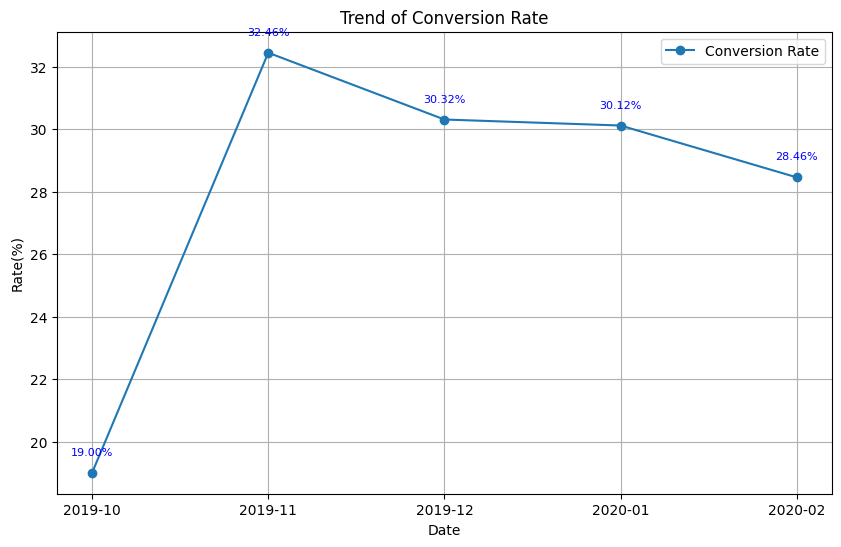

In [10]:
cvr_values = []

for i, df in enumerate([df1_1, df1_2, df1_3, df1_4, df1_5]):
    cvr = cvr_plot1(df)
    cvr_values.append(cvr)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cvr_values, marker='o', label='Conversion Rate')
plt.xticks(range(1, 6), ['2019-10', '2019-11', '2019-12', '2020-01', '2020-02'])
plt.xlabel('Date')
plt.ylabel('Rate(%)')
plt.title('Trend of Conversion Rate')
plt.legend()

for i, cvr in enumerate(cvr_values):
    plt.text(i + 1, cvr + 0.5, f'{cvr:.2f}%', ha='center', va='bottom', fontsize=8, color='blue')

plt.grid(True)
plt.show()

## 4.평가

### 내부 평가


In [15]:
## 장바구니 구매 전환율과 제거 전환율 비교

def cvr_plot2(df):
    cart_events = df[df['event_type'] == 'cart']
    purchase_events = df[df['event_type'] == 'purchase']
    remove_cart_events = df[df['event_type'] == 'remove_from_cart']

    cart_and_purchase = set(cart_events['user_id']).intersection(set(purchase_events['user_id']))
    cart_and_remove = set(cart_events['user_id']).intersection(set(remove_cart_events['user_id']))

    cart_users = cart_events['user_id'].nunique()
    purchase_users = len(cart_and_purchase)
    remove_users = len(cart_and_remove)

    if cart_users > 0:
        cvr = (purchase_users / cart_users) * 100
        de_cvr = (remove_users / cart_users) * 100

    else:
        cvr = 0
        de_cvr = 0

    return cvr, de_cvr

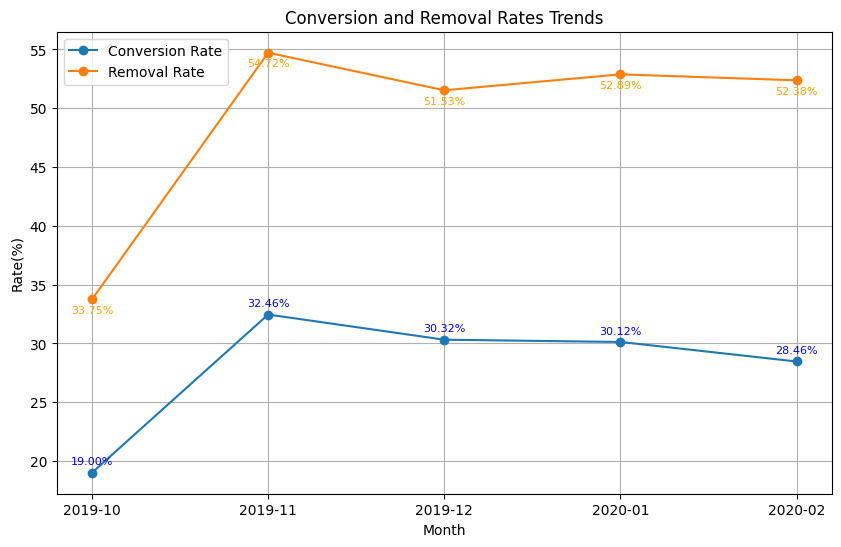

In [14]:
## 내부 평가 : 장바구니 제거 전환율과 비교 1

cvr_values = []
de_cvr_values = []

for i, df in enumerate([df1_1, df1_2, df1_3, df1_4, df1_5]):
    cvr, de_cvr = cvr_plot2(df)
    cvr_values.append(cvr)
    de_cvr_values.append(de_cvr)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cvr_values, marker='o', label='Conversion Rate')
plt.plot(range(1, 6), de_cvr_values, marker='o', label='Removal Rate')
plt.xticks(range(1, 6), ['2019-10', '2019-11', '2019-12', '2020-01', '2020-02'])
plt.xlabel('Month')
plt.ylabel('Rate(%)')
plt.title('Conversion and Removal Rates Trends')
plt.legend()

for i, (cvr, de_cvr) in enumerate(zip(cvr_values, de_cvr_values)):
    plt.text(i + 1, cvr + 0.5, f'{cvr:.2f}%', ha='center', va='bottom', fontsize=8, color='blue')
    plt.text(i + 1, de_cvr - 0.5, f'{de_cvr:.2f}%', ha='center', va='top', fontsize=8, color='orange')

plt.grid(True)
plt.show()

### 외부 평가 : 전체 구매율 확인해보기

In [19]:
## 평균 장바구니 구매 전환율

cvr_plot1(df1)

27.539608574091336

## 5.요인 분석

### 1) 장바구니 후 상품을 잊었을 가능성 확인하기

In [ ]:
df1['date'] = df1['event_time'].dt.date

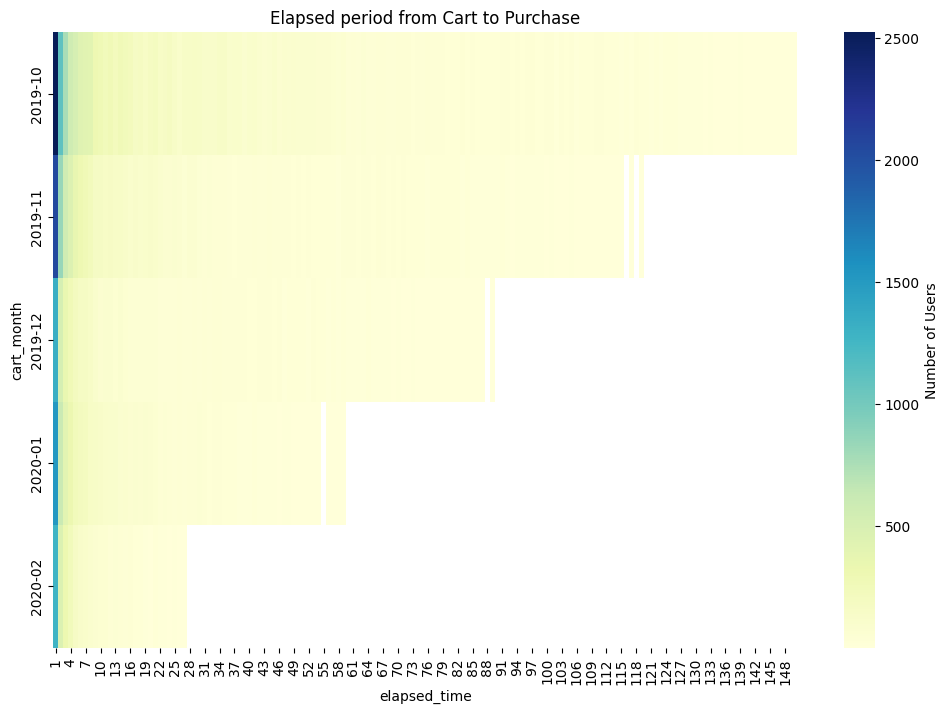

In [ ]:
## 구매 경과 기간

df1['date'] = pd.to_datetime(df1['date'])

cart_purchase_data = df1[df1['event_type'].isin(['cart', 'purchase'])]

cohort_df = cart_purchase_data.groupby(['user_id', 'event_type'])['date'].min().reset_index()

cohort_table = cohort_df.pivot(index='user_id', columns='event_type', values='date')

cohort_table = cohort_table[cohort_table['purchase'] > cohort_table['cart']]

cohort_table['elapsed_time'] = (cohort_table['purchase'] - cohort_table['cart']).dt.days

cohort_table['cart_month'] = cohort_table['cart'].dt.to_period('M')

cohort_table_reset = cohort_table.reset_index()

plt.figure(figsize=(12, 8))
sns.heatmap(cohort_table_reset.pivot_table(index='cart_month', columns='elapsed_time', values='user_id', aggfunc='count'),
            cmap='YlGnBu', annot=False, cbar_kws={'label': 'Number of Users'})
plt.title('Elapsed period from Cart to Purchase')
plt.show()

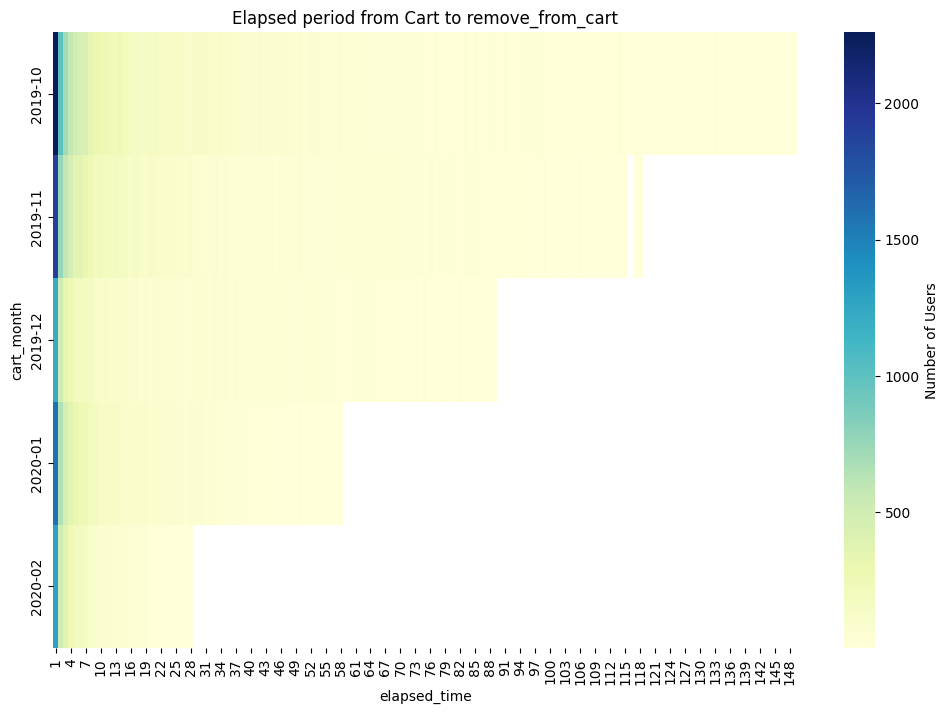

In [ ]:
## 제거 경과 기간

cart_remove_data = df1[df1['event_type'].isin(['cart', 'remove_from_cart'])]

cohort_df = cart_remove_data.groupby(['user_id', 'event_type'])['date'].min().reset_index()

cohort_table = cohort_df.pivot(index='user_id', columns='event_type', values='date')

cohort_table = cohort_table[cohort_table['remove_from_cart'] > cohort_table['cart']]

cohort_table['elapsed_time'] = (cohort_table['remove_from_cart'] - cohort_table['cart']).dt.days

cohort_table['cart_month'] = cohort_table['cart'].dt.to_period('M')

cohort_table_reset = cohort_table.reset_index()

plt.figure(figsize=(12, 8))
sns.heatmap(cohort_table_reset.pivot_table(index='cart_month', columns='elapsed_time', values='user_id', aggfunc='count'),
            cmap='YlGnBu', annot=False, cbar_kws={'label': 'Number of Users'})
plt.title('Elapsed period from Cart to remove_from_cart')
plt.show()

### 2) 가격으로 인한 고민일까?

In [25]:
a = df1['price'].value_counts()
pd.DataFrame(a)

,price
6.24,587540
4.97,561897
1.79,508282
4.00,489565
5.44,466239
...,...
16.92,1
39.87,1
25.59,1
28.76,1


In [32]:
# 이벤트 발생 top 가격대의 장바구니 구매 전환울 확인

df2_1 = df1[df1['price'] == 1.79]
df2_2 = df1[df1['price'] == 2.59]
df2_3 = df1[df1['price'] == 4]
df2_4 = df1[df1['price'] == 4.970000000000001]
df2_5 = df1[df1['price'] == 5.44]
df2_6 = df1[df1['price'] == 6.24]

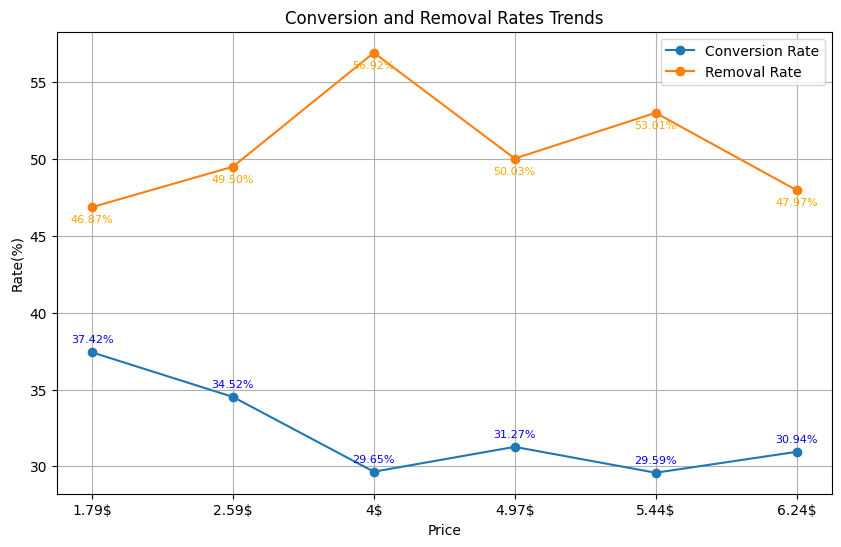

In [34]:
cvr_values = []
de_cvr_values = []

for i, df in enumerate([df2_1, df2_2, df2_3, df2_4, df2_5, df2_6]):
    cvr, de_cvr = cvr_plot2(df)
    cvr_values.append(cvr)
    de_cvr_values.append(de_cvr)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), cvr_values, marker='o', label='Conversion Rate')
plt.plot(range(1, 7), de_cvr_values, marker='o', label='Removal Rate')
plt.xticks(range(1, 7), ['1.79$', '2.59$', '4$', '4.97$', '5.44$', '6.24$'])
plt.xlabel('Price')
plt.ylabel('Rate(%)')
plt.title('Conversion and Removal Rates Trends')
plt.legend()

for i, (cvr, de_cvr) in enumerate(zip(cvr_values, de_cvr_values)):
    plt.text(i + 1, cvr + 0.5, f'{cvr:.2f}%', ha='center', va='bottom', fontsize=8, color='blue')
    plt.text(i + 1, de_cvr - 0.5, f'{de_cvr:.2f}%', ha='center', va='top', fontsize=8, color='orange')

plt.grid(True)
plt.show()

- 장바구니 구매 전환율이 1.79 > 2.59 > 4.97 > 6.24 > 4 > 5.44 순으로 높다는 것을 알 수 있다.
- 가격이 4와 5.44를 제외하고는 발생 건수와 비교하여 가격이 낮은 순으로 높다는 것을 확인할 수 있다.


## 6.액션 제안

#### 1. 상품의 구매 고민 기간을 7일까지 늘리도록 하는 것과 그 이상이 넘어가지 않도록 구매 촉구
- 리워드 증정 : 7일 이내 구매 시 할인 쿠폰 증정
- 앱 또는 웹 푸시 알림 : 장바구니 후 7일이 지나지 않도록 7일 차에 쿠폰 기한 마감과 함께 장바구니 상품 알림

#### 2. 4(달러) 상품과 5.44(달러) 상품의 가격 할인 이벤트를 진행하는 것을 제안